# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Julia Hernández Cárdenas  |
| **Fecha**      | 25/08/2025  |
| **Expediente** | 739208  |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
ad = pd.read_csv("Advertising.csv")
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- **¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?**

Es importante determinar si hay relación entre los datos del presupuesto de publicidad y el de ventas porque si no existiera, podría decirnos que la estrategia actual de publicidad no está influyendo en nada en las ventas, por lo que se tendría que hacer un re ajuste 

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Diría que si es algo fuerte, porque entre más presupuesto se dirige a publicidad, son mayores las ventas. Conocer esta información nos sirve para ver cuánto presupuesto es el ideal que se dirija a publicidad, y cuánto está bien redirigirlo hacia otras áreas

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [3]:
lr1 = LinearRegression()

In [4]:
X = ad[['TV']]
X = X.values.reshape(-1,1)
y = ad[['sales']]

In [5]:
lr1.fit(X,y)

B0 = lr1.intercept_
B0

array([7.03259355])

In [6]:
B1 = lr1.coef_
B1 = B1[0,0]
B1

0.04753664043301979

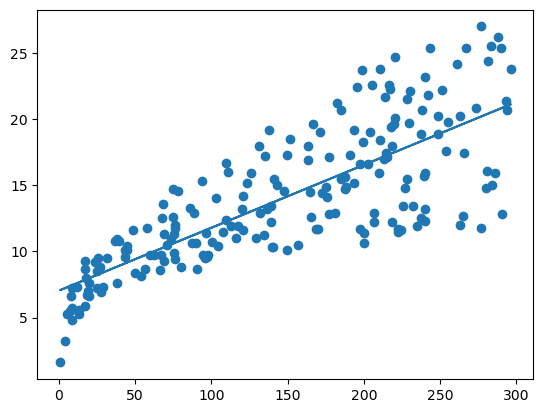

In [7]:
plt.scatter(X,y)
plt.plot(X,lr1.predict(X))

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

**¿Cuál es la diferencia entre población y muestra?**

La población es todo, la muestra es sólo una parte. En otras palabras, la población es el conjunto total de elementos de los que queremos obtener información, mientras que la muestra es un subconjunto representativo de la población, que se selecciona para hacer el estudio.

Velázquez, A. (2023, May 9). ¿Cuál es la diferencia entre población y muestra? QuestionPro. https://www.questionpro.com/blog/es/diferencia-entre-poblacion-y-muestra/

**¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?**

Hacer una regresión con todos los datos de la población te la los resultados exactos, mientras que con la muestra te da aproximaciones. Por eso al hacerlo con la muestra, se analizan otros parámetros como el error estándar y los intervalos de confianza, para medir que tan aproximado y preciso es el modelado

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [8]:
lr1.fit(X,y)
y1 = lr1.predict(X)

In [9]:
X1 = len(X)

In [10]:
RSS = np.sum((y - y1) ** 2)
print(float(RSS))

2102.5305831313512


In [11]:
var = RSS / (X1 - 2)
print(float(var))

10.618841328946218


In [12]:
arriba = ((np.mean(X)) ** 2)
abajo = np.sum((X - np.mean(X)) ** 2)

In [13]:
SE_beta0 =np.sqrt(var * [(1/X1) + (arriba / abajo)])
print(float(SE_beta0))

0.4578429402734785


In [14]:
SE_beta1 = np.sqrt(var / abajo)
print(float(SE_beta1))

0.0026906071877968707


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [15]:
B0 - 2*SE_beta0, B0 + 2*SE_beta0

(sales    6.116908
 dtype: float64,
 sales    7.948279
 dtype: float64)

In [16]:
B1 - 2*SE_beta1, B1 + 2*SE_beta1 

(sales    0.042155
 dtype: float64,
 sales    0.052918
 dtype: float64)

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

**Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.**

La hipótesis nula es la que se tiene de base y se trata de "rechazar", es la que dice que no existe ningún tipo de relación entre las muestras. La hipótesis alternativa es la que se trata de probar, pero tiene que haber suficiente evidencia para que se pueda afirmar que es verdadera. Esta dice que si existe relación entre los datos 




Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [17]:
#MIU = 0

In [18]:
t0 = B0 / SE_beta0
print(float(t0))

15.360275174117534


In [19]:
t1 = B1 / SE_beta1
print(float(t1))

17.66762560087556


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [20]:
from scipy import stats

In [21]:
p_B0 = 2*(1 - stats.t.cdf(np.abs(t0), X1-2))
print(float(p_B0))

0.0


In [22]:
p_B1 = 2*(1 - stats.t.cdf(np.abs(t1), X1-2))
print(float(p_B1))

0.0


**¿Se rechaza la hipótesis nula? ¿Qué significa?**

Como el p-value de las betas es cero, SI se rechaza H0, lo que significa que con el 5% de confianza, si existe una relación entre el presupuesto de publicidad para la TV y las ventas

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

**NOTAAAAA**

Si el p - value es = 0, se RECHAZA la hipótesis nula (H0). O sea, si existe relación. 

Si el p - value es DIFERENTE de cero, se ACEPA H0, NO hay relación.

# RADIO 

**Coeficientes estimados**

Beta 0: [9.3116381]
Beta 1: 0.20249578339243957


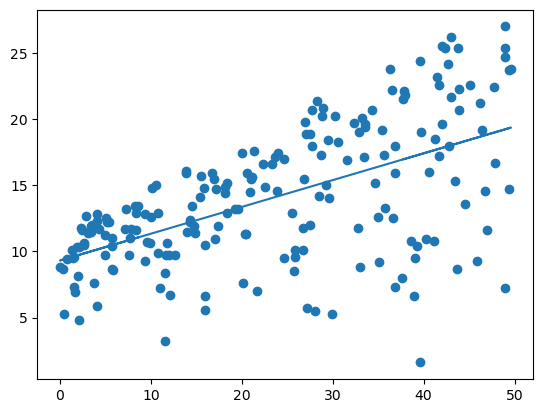

In [23]:
lr2 = LinearRegression()

Xr = ad[['radio']]
Xr = Xr.values.reshape(-1,1)
yr = ad[['sales']]

lr2.fit(Xr,yr)

Br0 = lr2.intercept_
print(f"Beta 0: {Br0}")

Br1 = lr2.coef_
Br1 = Br1[0,0]
print(f"Beta 1: {Br1}")

plt.scatter(Xr,yr)
plt.plot(Xr,lr2.predict(Xr))

**errores estándar**

In [24]:
lr2.fit(Xr,yr)
y2 = lr2.predict(Xr)

X2 = len(Xr)

RSS_r = np.sum((yr - y2) ** 2)

var_r = RSS_r / (X2 - 2)

arriba_r = ((np.mean(Xr)) ** 2)
abajo_r = np.sum((Xr - np.mean(Xr)) ** 2)

SE_beta0_r =np.sqrt(var_r * [(1/X2) + (arriba_r / abajo_r)])
print(f"error estándar de Beta 0: {float(SE_beta0_r)}")

SE_beta1_r = np.sqrt(var_r / abajo_r)
print(f"error estándar de Beta 1: {float(SE_beta1_r)}")

error estándar de Beta 0: 0.5629004962718711
error estándar de Beta 1: 0.020411306360090635


**Intervalos de confianza**

In [25]:
Br0 - 2*SE_beta0_r, Br0 + 2*SE_beta0_r

(sales    8.185837
 dtype: float64,
 sales    10.437439
 dtype: float64)

In [26]:
Br1 - 2*SE_beta1_r, Br1 + 2*SE_beta1_r

(sales    0.161673
 dtype: float64,
 sales    0.243318
 dtype: float64)

**Estadísticos t**

In [27]:
tr0 = Br0 / SE_beta0_r
print(f"estadístico t de Beta 0: {float(tr0)}")

tr1 = Br1 / SE_beta1_r
print(f"estadístico t de Beta 1: {float(tr1)}")

estadístico t de Beta 0: 16.54224531125822
estadístico t de Beta 1: 9.920765472824954


**p - values** 

In [28]:
p_B0_r = 2*(1 - stats.t.cdf(np.abs(tr0), X2-2))
print(f"p value de Beta 0: {float(p_B0_r)}")

p_B1_r = 2*(1 - stats.t.cdf(np.abs(tr1), X2-2))
print(f"p value de Beta 1: {float(p_B1_r)}")

p value de Beta 0: 0.0
p value de Beta 1: 0.0


**Observaciones**

Desde que se observa la gráfica, podemos inferir que si existe una relación entre la publiciad de la radio y las ventas, aunque no tan fuerte como de la TV (esto porque los datos están más dispersos). Y después, al sacar los p-values, se confirma nuevamente que si existe relación, ya que se rechaza H0 porque los valores son 0

# PERIODICO 

**Coeficientes estimados**

Beta 0: [12.35140707]
Beta 1: 0.05469309847227336


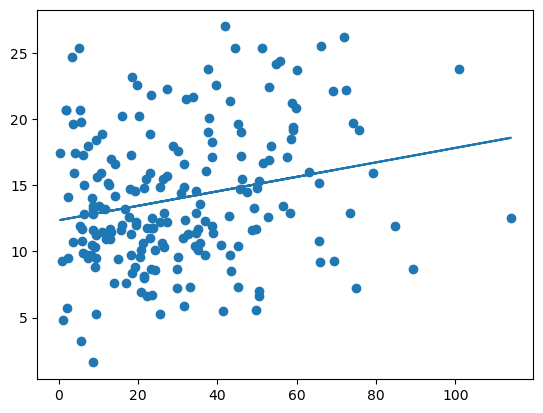

In [29]:
lr3 = LinearRegression()

Xp = ad[['newspaper']]
Xp = Xp.values.reshape(-1,1)
yp = ad[['sales']]

lr3.fit(Xp,yp)

Bp0 = lr3.intercept_
print(f"Beta 0: {Bp0}")

Bp1 = lr3.coef_
Bp1 = Bp1[0,0]
print(f"Beta 1: {Bp1}")

plt.scatter(Xp,yp)
plt.plot(Xp,lr3.predict(Xp))

**Errores estándar**

In [30]:
lr3.fit(Xp,yp)
y3 = lr3.predict(Xp)

X3 = len(Xp)

RSS_p = np.sum((yp - y3) ** 2)

var_p = RSS_p / (X3 - 2)

arriba_p = ((np.mean(Xp)) ** 2)
abajo_p = np.sum((Xp - np.mean(Xp)) ** 2)

SE_beta0_p =np.sqrt(var_p * [(1/X3) + (arriba_p / abajo_p)])
print(f"error estándar de Beta 0: {float(SE_beta0_p)}")

SE_beta1_p = np.sqrt(var_p / abajo_p)
print(f"error estándar de Beta 1: {float(SE_beta1_p)}")

error estándar de Beta 0: 0.6214201876094345
error estándar de Beta 1: 0.016575721876358165


**Interválos de confianza**

In [31]:
Bp0 - 2*SE_beta0_p, Bp0 + 2*SE_beta0_p

(sales    11.108567
 dtype: float64,
 sales    13.594247
 dtype: float64)

In [32]:
Bp1 - 2*SE_beta1_p, Bp1 + 2*SE_beta1_p

(sales    0.021542
 dtype: float64,
 sales    0.087845
 dtype: float64)

**Estadísticos t**

In [33]:
tp0 = Bp0 / SE_beta0_p
print(f"estadístico t de Beta 0: {float(tp0)}")

tp1 = Bp1 / SE_beta1_p
print(f"estadístico t de Beta 1: {float(tp1)}")

estadístico t de Beta 0: 19.876095620248947
estadístico t de Beta 1: 3.2995907436334186


**p - values**

In [34]:
p_B0_p = 2*(1 - stats.t.cdf(np.abs(tp0), X3-2))
print(f"p value de Beta 0: {float(p_B0_p)}")

p_B1_p = 2*(1 - stats.t.cdf(np.abs(tp1), X3-2))
print(f"p value de Beta 1: {float(p_B1_p)}")

p value de Beta 0: 0.0
p value de Beta 1: 0.0011481958688881466


**Observaciones**

Como el p - value NO es igual a 0, se rechaza la hipótesis alternativa de que si existe una relación entre la publicidad en el periódico y las ventas, y al observar la gráfica de los datos, podemos corroborar este resultado 

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [35]:
X_todo = ad[['TV', 'radio', 'newspaper']]
X_todo = sm.add_constant(X_todo)
y_todo = ad['sales']

In [36]:
ols = sm.OLS(y_todo, X_todo)

In [37]:
results = ols.fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        16:32:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?**

Los p-values individuales son más pequeños porque están más enfocados, únicamente toma en cuenta la relación entre una variable y los resultados, mientras que el p-value en la regresión múltiple de algunas puede crecer, indicando que en realidad esa variable no es tan significativa 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*